# Use SPORF to Draw Decision Boundaries

The purpose of this notebook is to show that the oblique tree in ProgLearn is correct and can accurately determine oblique splits.

## Import required packages

In [2]:
from rerf.rerfClassifier import rerfClassifier

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.ensemble import RandomForestClassifier

from proglearn.forest import LifelongClassificationForest
from proglearn.voters import TreeClassificationVoter
from proglearn.transformers import TreeClassificationTransformer
from proglearn.transformers import ObliqueTreeClassificationTransformer
from proglearn.deciders import SimpleArgmaxAverage

from functions.sporf_decision_boundaries_functions import test

## Set parameters, initialize datasets, and initialize classifiers

In [3]:
NT = 10

h = .1  # step size in the mesh

names = ["RF", "RerF", "Proglearn-SPORF"]

classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=NT, max_features=1),
    rerfClassifier(n_estimators = NT, feature_combinations=1.5, max_features=2),
    LifelongClassificationForest(oblique=True, default_feature_combinations=1, default_density=0.5)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

## Run on all datasets for all models

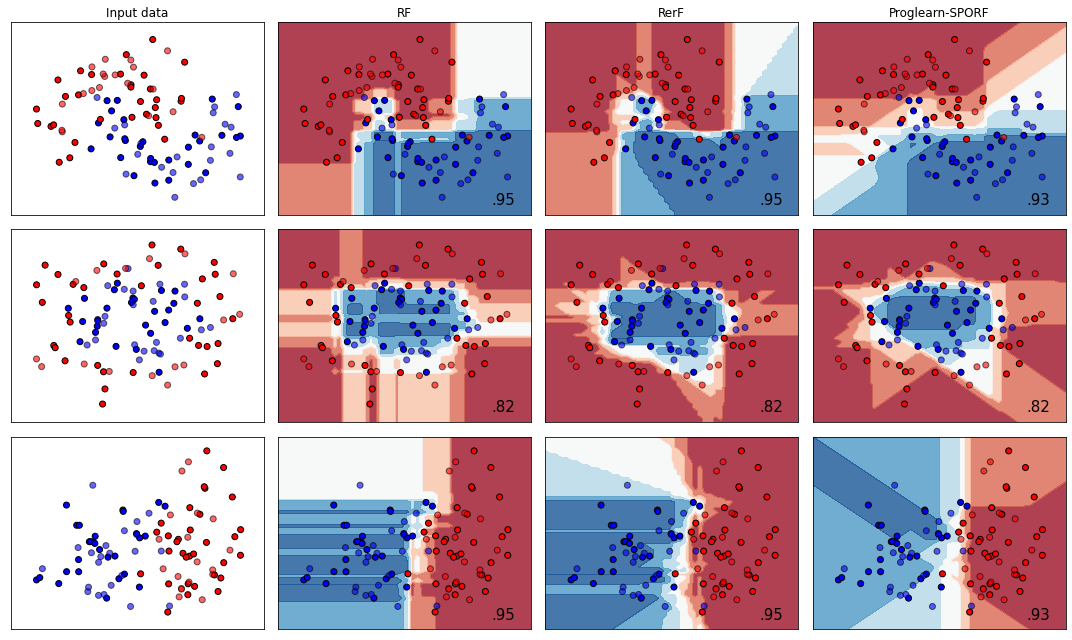

In [4]:
figure = plt.figure(figsize=(15, 9))
test(NT, h, names, classifiers, datasets)
plt.tight_layout()